In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# turn off top and rigt axis line in matplotlib
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# change font size in matplolib
plt.rcParams.update({'font.size': 14})

# increasing the deafult DPI to improve resolution
#plt.rcParams['figure.dpi']= 50 # for preview
plt.rc("savefig", dpi = 300) # for saving

In [8]:
# Import labelled tweet data

files = {}
names = ['df16', 'df17', 'df18', 'df19', 'df20']
year = [2016, 2017, 2018, 2019, 2020]

for i in names:
    files[i] = pd.read_excel(f"../../Data/BOX/utahlake_{year[names.index(i)]}_labeled_nolink_pn.xlsx").copy()

In [9]:
for i in files:
    
    # Select relevant column
    files[i] = files[i].loc[:,["time","positive or negative?","water quality?"]].copy()
    
    # Convert label values to lowercase
    files[i]['positive or negative?'] = files[i]['positive or negative?'].str.lower()
    
    # Check column info
    files[i].info()
    
    # Make new columns for positive and negative sentiment tweets
    # to add 1 in column 'neg' if a tweet is negative
    # and add 1 in column in 'pos' if a tweet is positive
    files[i]['neg'] = files[i]['positive or negative?'].str.count('n')
    files[i]['pos'] = files[i]['positive or negative?'].str.count('p')
    
    
    # Join each year data
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   622 non-null    datetime64[ns]
 1   positive or negative?  215 non-null    object        
 2   water quality?         214 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   570 non-null    datetime64[ns]
 1   positive or negative?  159 non-null    object        
 2   water quality?         175 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entr

In [10]:
# Concatenate all the dataframes row-wise
tweets = pd.concat([files['df16'], files['df17'], files['df18'],
                   files['df19'], files['df20']], ignore_index=True)

In [11]:
# Sum tweets in 1 day by sentiment
tweets = tweets.groupby([pd.Grouper(key='time', freq='D')])[tweets.columns[2:]].sum()

In [12]:
tweets.head()

,water quality?,neg,pos
time,,,
2016-01-01,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.0


In [13]:
tweets.describe()

,water quality?,neg,pos
count,1823.000000,1823.000000,1823.000000
mean,0.391662,0.351618,0.029622
std,1.931931,1.832984,0.237070
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,46.000000,43.000000,6.000000


In [15]:
tweets['water quality?'].value_counts()

0.0     1543
1.0      182
2.0       45
4.0       14
3.0        9
9.0        5
7.0        4
6.0        3
5.0        3
23.0       2
10.0       2
16.0       2
12.0       2
11.0       2
14.0       1
13.0       1
28.0       1
46.0       1
8.0        1
Name: water quality?, dtype: int64

In [16]:
tweets.neg.value_counts()

0.0     1569
1.0      176
2.0       32
4.0       10
3.0        7
9.0        6
6.0        3
10.0       3
7.0        3
5.0        3
16.0       2
12.0       2
23.0       1
14.0       1
19.0       1
28.0       1
11.0       1
43.0       1
8.0        1
Name: neg, dtype: int64

In [17]:
tweets.pos.value_counts()

0.0    1782
1.0      34
2.0       4
3.0       2
6.0       1
Name: pos, dtype: int64

In [ ]:
# Ratio of positive to negative tweets

In [ ]:
# Total number of water quality tweets

In [23]:
############ add more variable types like % stuff
tweets.head()

,water quality?,neg,pos
time,,,
2016-01-01,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0
2016-01-05,0.0,0.0,0.0


In [24]:
# Sum tweets for 7 days by sentiment
tweets_week = tweets.reset_index().groupby([pd.Grouper(key='time', freq='W')])[tweets.columns[0:]].sum()

In [58]:
abc = pd.DataFrame(tweets_week['water quality?'].value_counts()).reset_index()
abc.columns = [["Number of tweets per week", "Frequency"]]
abc

,Number of tweets per week,Frequency
0,0.0,120
1,1.0,52
2,2.0,30
3,3.0,20
4,5.0,9
5,10.0,5
6,4.0,5
7,7.0,3
8,6.0,2
9,14.0,2


In [59]:
abc = pd.DataFrame(tweets_week['neg'].value_counts()).reset_index()
abc.columns = [["Number of negative tweets per week", "Frequency"]]
abc

,Number of negative tweets per week,Frequency
0,0.0,127
1,1.0,56
2,2.0,31
3,3.0,11
4,4.0,9
5,5.0,5
6,10.0,3
7,14.0,2
8,6.0,2
9,9.0,2


In [60]:
abc = pd.DataFrame(tweets_week['pos'].value_counts()).reset_index()
abc.columns = [["Number of negative tweets per week", "Frequency"]]
abc

,Number of negative tweets per week,Frequency
0,0.0,229
1,1.0,22
2,2.0,5
3,3.0,4
4,10.0,1


In [48]:
# Ratio of negative to positive per week
tweets_week['ratio'] = tweets_week.neg / tweets_week.pos

In [49]:
tweets_week.head(50)

,water quality?,neg,pos,ratio
time,,,,
2016-01-03,0.0,0.0,0.0,NaN
2016-01-10,0.0,0.0,0.0,NaN
2016-01-17,3.0,3.0,0.0,inf
2016-01-24,0.0,0.0,0.0,NaN
2016-01-31,0.0,0.0,0.0,NaN
2016-02-07,0.0,0.0,0.0,NaN
2016-02-14,0.0,0.0,0.0,NaN
2016-02-21,2.0,2.0,0.0,inf
2016-02-28,0.0,0.0,0.0,NaN


In [50]:
tweets_week.ratio.value_counts()

inf          107
1.000000       8
2.000000       6
0.000000       5
0.666667       2
0.400000       1
1.333333       1
15.666667      1
11.000000      1
14.000000      1
9.000000       1
0.500000       1
4.000000       1
15.000000      1
2.500000       1
8.000000       1
Name: ratio, dtype: int64

# Daily tweets

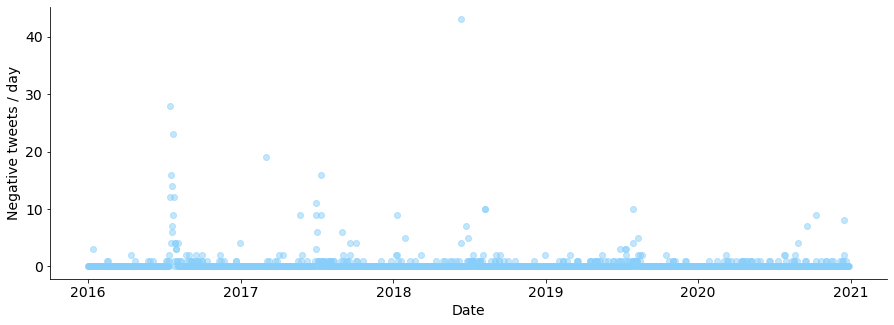

In [61]:
# Negative tweets
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets.index, tweets.neg, color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Negative tweets / day')

plt.savefig("../11 daily_neg_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

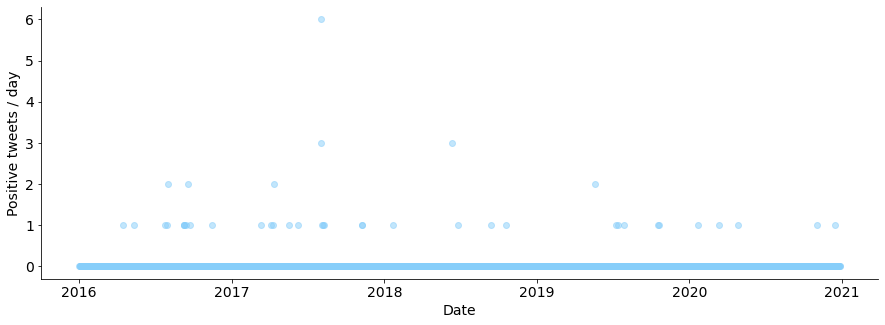

In [63]:
# Positive tweets
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets.index, tweets.pos, color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Positive tweets / day')

plt.savefig("../11 daily_pos_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

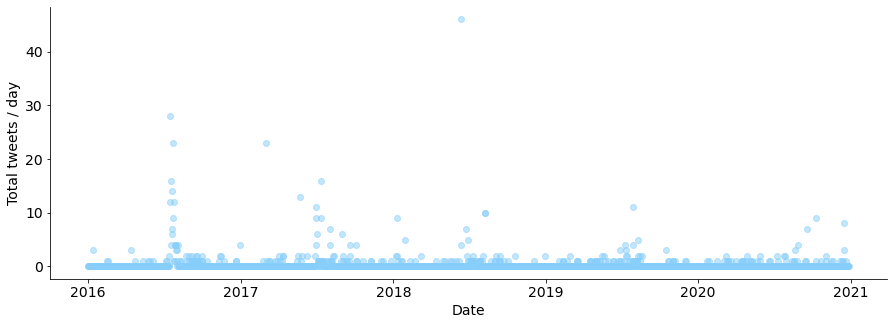

In [64]:
# All types
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets.index, tweets['water quality?'], color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Total tweets / day')

plt.savefig("../11 daily_total_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

C:\Users\rapiduser\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


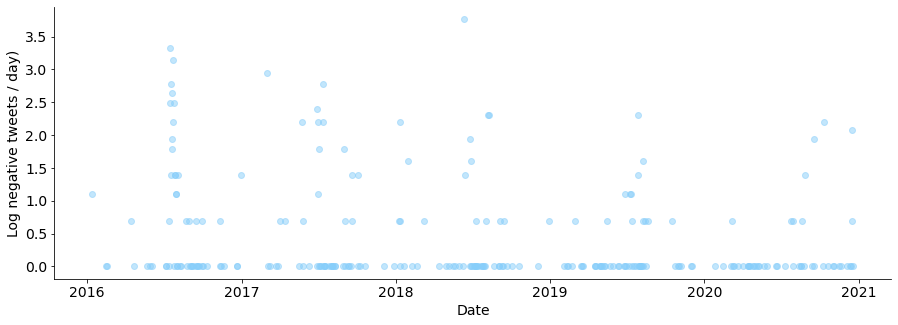

In [65]:
# Log negative tweets
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets.index, np.log(tweets.neg), color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Log negative tweets / day)')

plt.savefig("../11EXTRA daily_log_neg_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

[Text(0.5, 0, 'Tweets / day'), Text(0, 0.5, 'Number of observations (n=641)')]

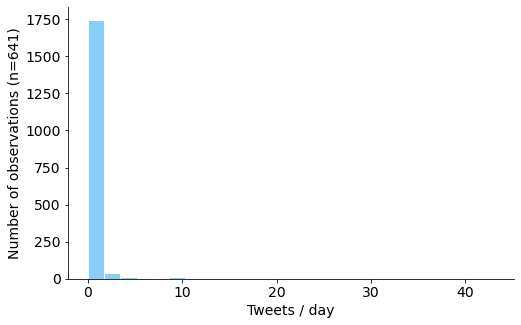

In [144]:
# Plot histogram to see distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(tweets.neg, bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Tweets / day', ylabel=f'Number of observations (n={sum(tweets.neg):.0f})')
#ax.set_ylim([0,10]);

In [136]:
# Before log transforming, add a small number to zero values
tweets_log = tweets.copy()
tweets_log = tweets_log.mask(tweets_log==0)

,neg,pos
time,,
2016-01-01,NaN,NaN
2016-01-02,NaN,NaN
2016-01-03,NaN,NaN
2016-01-04,NaN,NaN
2016-01-05,NaN,NaN


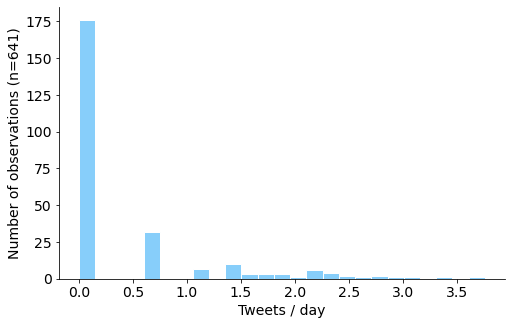

In [145]:
# Plot histogram to see distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(np.log(tweets_log.neg), bins=25, color='lightskyblue', linewidth=1, edgecolor="white")
ax.set(xlabel='Tweets / day', ylabel=f'Number of observations (n={sum(tweets.neg):.0f})');
#ax.set_ylim([0,10]);
# make the scale whole number

In [ ]:
# Weekly

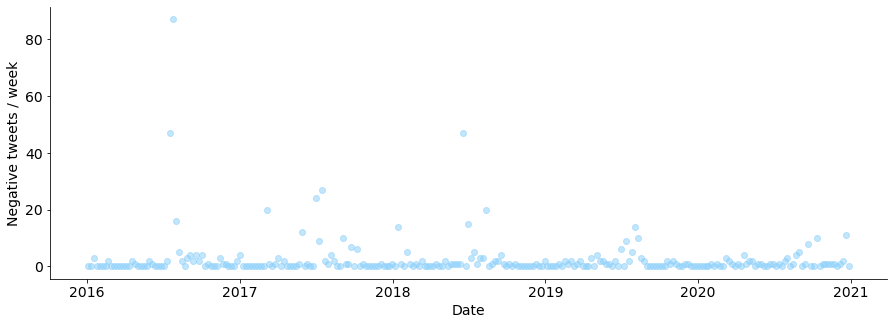

In [66]:
# Negative tweets
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets_week.index, tweets_week.neg, color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Negative tweets / week')

plt.savefig("../12 weekly_neg_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

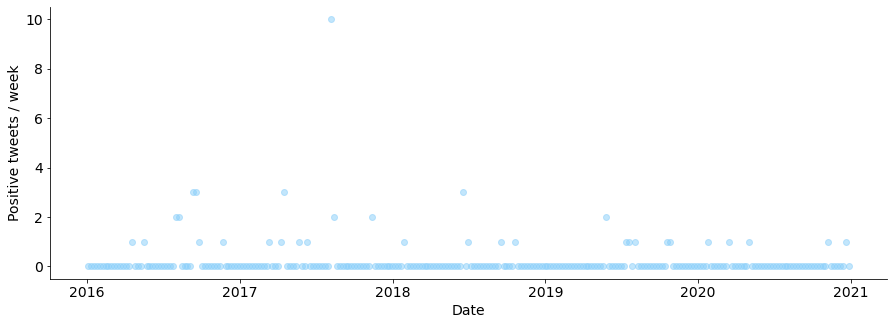

In [67]:
# Positive tweets
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets_week.index, tweets_week.pos, color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Positive tweets / week')

plt.savefig("../12 weekly_pos_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

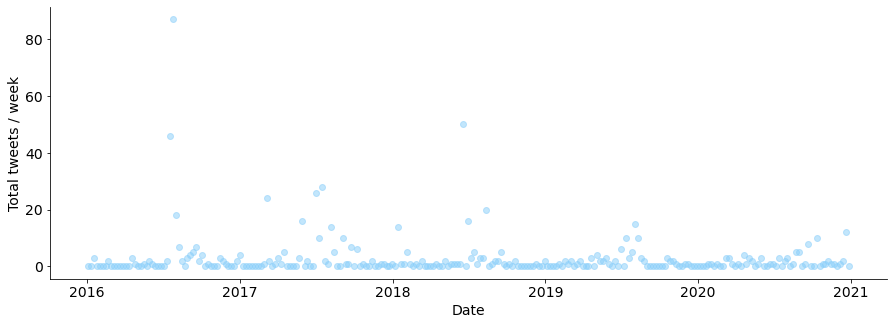

In [68]:
# All types
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets_week.index, tweets_week['water quality?'], color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Total tweets / week')

plt.savefig("../12 weekly_total_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

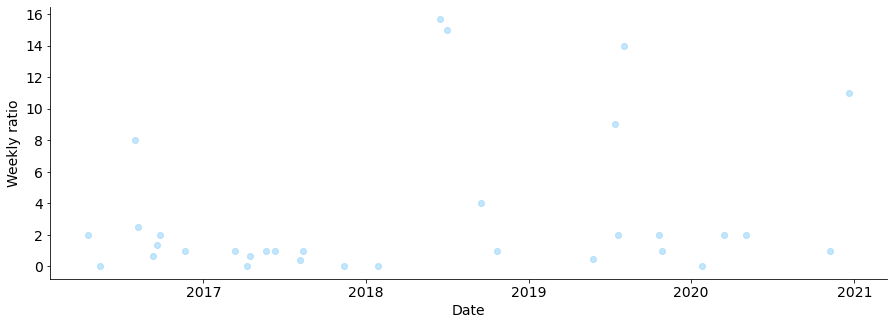

In [69]:
# Weekly negative ratio
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets_week.index, tweets_week['ratio'], color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Weekly ratio')

plt.savefig("../12 weekly_ratio_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

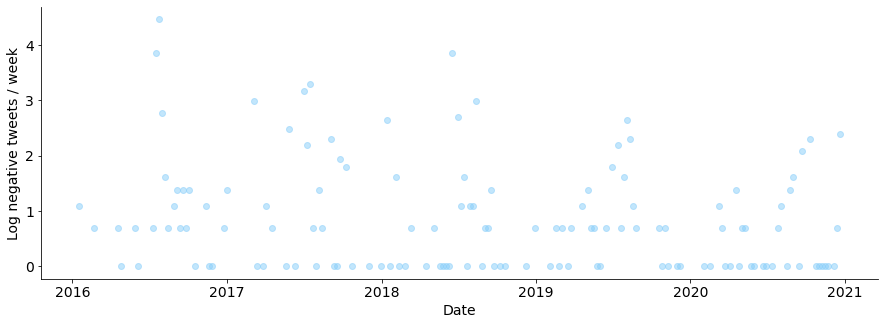

In [70]:
# Negative tweets
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(tweets_week.index, np.log(tweets_week.neg), color='lightskyblue', linewidth=1, alpha=0.5)
#ax.scatter(tweets.index, tweets.pos, color='red', linewidth=1, alpha=0.5)
ax.set(xlabel='Date', ylabel=f'Log negative tweets / week')

plt.savefig("../12EXTRA weekly_log_neg_ts", bbox_inches = 'tight');
#ax.set_ylim([0,10]);

In [ ]:
# Export tweet data
tweets.to_csv("../../data/processed/daily_tweet_count.csv", index=False)
tweets_week.to_csv("../../data/processed/weekly_tweet_count.csv", index=False)

In [19]:
# df16 = pd.read_excel("../../Data/BOX/utahlake_2016_labeled_nolink_pn.xlsx")
# df17 = pd.read_excel("../../Data/BOX/utahlake_2017_labeled_nolink_pn.xlsx")
# df18 = pd.read_excel("../../Data/BOX/utahlake_2018_labeled_nolink_pn.xlsx")
# df19 = pd.read_excel("../../Data/BOX/utahlake_2019_labeled_nolink_pn.xlsx")
# df20 = pd.read_excel("../../Data/BOX/utahlake_2020_labeled_nolink_pn.xlsx")

# Check on 2016 dataframe

In [26]:
df16 = files['df16']

In [36]:
# Select relevant columns
df16 = df16.loc[:,["time","positive or negative?"]].copy()

In [28]:
# Convert label values to lowercase
df16['positive or negative?'] = df16['positive or negative?'].str.lower()

In [37]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   622 non-null    datetime64[ns]
 1   positive or negative?  215 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 9.8+ KB


In [38]:
df16.head()

,time,positive or negative?
0,2016-12-31 04:27:41,n
1,2016-12-31 04:27:41,n
2,2016-12-31 04:27:34,n
3,2016-12-31 04:27:16,n
4,2016-12-29 20:51:45,NaN


In [52]:
df16['neg'] = 0

In [55]:
for i in df16.index:
    df16.loc[i,'neg'] = df16.loc[i,'positive or negative?'].str.count('n')
    #print(df16.loc[i,'positive or negative?'])

AttributeError: 'str' object has no attribute 'str'

In [58]:
# Make new columns for positive and negative sentiment tweets
# to add 1 in column 'neg' if a tweet is negative
# and add 1 in column in 'pos' if a tweet is positive
df16['neg'] = df16['positive or negative?'].str.count('n')
df16['pos'] = df16['positive or negative?'].str.count('p')

In [59]:
df16.head()

,time,positive or negative?,pos,neg
0,2016-12-31 04:27:41,n,0.0,1.0
1,2016-12-31 04:27:41,n,0.0,1.0
2,2016-12-31 04:27:34,n,0.0,1.0
3,2016-12-31 04:27:16,n,0.0,1.0
4,2016-12-29 20:51:45,NaN,NaN,NaN


In [60]:
# group by each day
df16 = df16.groupby([pd.Grouper(key='time', freq='D')])[df16.columns[2:]].sum()

In [63]:
df16.head(50)

,pos,neg
time,,
2016-01-01,0.0,0.0
2016-01-02,0.0,0.0
2016-01-03,0.0,0.0
2016-01-04,0.0,0.0
2016-01-05,0.0,0.0
2016-01-06,0.0,0.0
2016-01-07,0.0,0.0
2016-01-08,0.0,0.0
2016-01-09,0.0,0.0


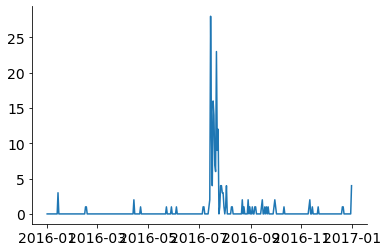

In [64]:
plt.plot(df16.neg);

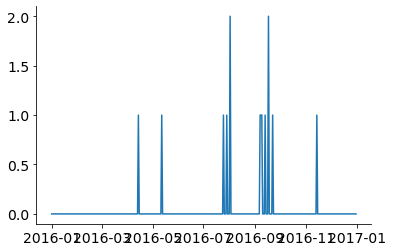

In [66]:
plt.plot(df16.pos);